In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Flipping Coins
Demonstrating variance of outcomes flipping coins. Start with 4 trials, then 10 trials, then 100 trials to demonstrate the difference. What we know is that the result is highly impacted by sample size. We would say "in the long run", if you keep flipping coins you will have an experiment that results in 50 percent heads and 50 percent tails.

In [2]:
np.random.seed(10)
n = 4
choices = ['heads', 'tails']
result = np.random.choice(choices, n)
print("Total Trials:", n, "\nHeads:", sum(result == 'heads'), "\nProbability of Heads:", sum(result == 'heads')/n)

Total Trials: 4 
Heads: 1 
Probability of Heads: 0.25


In [11]:
# 10 trials
n = 10
result = np.random.choice(choices, n)
print("Total Trials:", n, "\nHeads:", sum(result == 'heads'), "\nProbability of Heads:", sum(result == 'heads')/n)

Total Trials 10 
Heads: 4 
Probability of Heads: 0.4


In [12]:
# 100 trials
n = 100
result = np.random.choice(choices, n)
print("Total Trials:", n, "\nHeads:", sum(result == 'heads'), "\nProbability of Heads:", sum(result == 'heads')/n)

Total Trials: 100 
Heads: 60 
Probability of Heads: 0.6


In [14]:
for n in [100, 1000, 10000]:
    result = np.random.choice(choices, n)
    prob = sum(result == 'heads')/n
    print("Trials:",n,"Probability:",prob,"\n")

Trials: 100 Probability: 0.47 

Trials: 1000 Probability: 0.51 

Trials: 10000 Probability: 0.4932 



## Power
Statistical power, a measure of the confidence of an experiment. 

$
\beta = \Phi\left(\frac{|\mu_t-\mu_c|\sqrt{N}}{2\sigma}-\Phi^{-1}\left(1-\frac{\alpha}{2}\right)\right)
$

Power is represented by $\beta$ and the $\Phi(\bullet)$ is the normal cumulative distribution function with the effect size being represented by $|\mu_t-\mu_c|$, $\alpha$ being the desired level of statistical significance which is typically 0.05, and N representing the sample size. Let's rely on the *statsmodel* Python module for our power calculations. Before we get back to baseball, let's use our coin-flipping example to demonstrate how this works.

Suppose we have a coin that we suspect is biased to flipping tails 40% of the time. If we were to conduct an experiment to *prove* this suspicion, how many time would we need to flip the coin? The power solver in *statsmodels* allows us to specify our desired power and it will compute the number of samples needed. Here, we're going to aim for a power of 0.8 and an $\alpha$ of 0.05 which are both pretty standard. We'll also need to specify the **effect size**, which will be the difference between the an unbiased coin ($\mu_c=0.5$) and the supposed biased coin ($\mu_t=0.4$).

In [3]:
from statsmodels.stats.power import  tt_ind_solve_power
mu_t, mu_c = 0.5, 0.4
effect_size = mu_t - mu_c
N, alpha, power = 1000, 0.05, 0.8
Ncalc = tt_ind_solve_power(effect_size=effect_size, power=power, nobs1=None, alpha=alpha, ratio=1.0)
print(Ncalc)

1570.733066331529


Our power calculation tells us that we need to perform $1,570$ coin flips to satisfy these constraints. In English, this means that if we want 80% of the times that we run this experiment to detect an effect change of 0.1 with 95% confidence, then we must have a sample size of at least $1,570$. Okay, now we can get back to baseball...

Power of 0.8 is a high bar to set for a lot of experiments. In actuality there are compromises that need to be made. Even using the toy example of flipping a coin. If I ask my kids to conduct this coin flipping experiment, I bet they could stay focused on it for 100, maybe 200 coin flips. But $1570$? I doubt it. The outcome of the experiment is subject then to higher variance which means the resulting outcome is more likely to be wrong (i.e. less confident).

We can test this by simulating the experiment many times and seeing how different the results are. We'll replicate the experiment using *numpy* 100 times each as follows:
* Experiment 1: Biased coin, 1,570 samples
* Experiment 2: Biased coin, 150 samples

In [4]:
from scipy import stats
# experiment 1
N_1 = 1570
results_1 = np.empty([1,100])
for i in range(100):
    temp_result = np.random.choice(choices, N_1, p=[mu_c, 1-mu_c])
    results_1[0,i] =sum(temp_result == 'heads')/N_1
print("Experiment 1:",results_1.mean(), results_1.std(), results_1.var())

# experiment 2
N_2 = 150
results_2 = np.empty([1,100])
for i in range(100):
    temp_result = np.random.choice(choices, N_2, p=[mu_c, 1-mu_c])
    results_2[0,i] =sum(temp_result == 'heads')/N_2
print("Experiment 2:",results_2.mean(), results_2.std(), results_2.var())

Experiment 1: 0.4009044585987261 0.012835044474719165 0.00016473836666801897
Experiment 2: 0.40493333333333337 0.04107034615550901 0.0016867733333333337


In [20]:
sig1 = 2*results_1.std()
print("Experiment 1 interval: ["+ str(results_1.mean()-sig1)+","+str(results_1.mean()+sig1)+"]")
sig2 = 2*results_2.std()
print("Experiment 2 interval: ["+ str(results_2.mean()-sig2)+","+str(results_2.mean()+sig2)+"]")

Experiment 1 interval: [0.37523436964928775,0.42657454754816443]
Experiment 2 interval: [0.32279264102231536,0.48707402564435137]


C:\Users\Gutwein\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


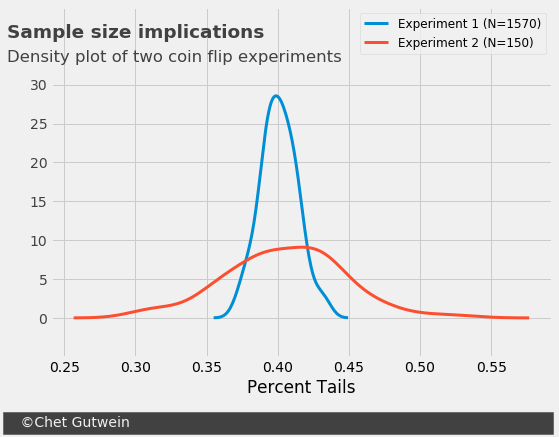

In [19]:
## Create density plots
import seaborn as sns

# Setting FiveThirtyEight style
plt.style.use('fivethirtyeight')

# Setting size of our plot
fig, ax = plt.subplots(figsize=(8,6))

# Generate density plots
sns.distplot(results_1[0,:], hist = False, kde = True,
            kde_kws = {'linewidth': 3},
            label = 'Experiment 1 (N=1570)')

sns.distplot(results_2[0,:], hist = False, kde = True,
            kde_kws = {'linewidth': 3},
            label = 'Experiment 2 (N=150)')
    
# Plot formatting
plt.legend(prop={'size': 12}, title = '')
#plt.title('Density Plot of Coin Flip Experiment Results')
#plt.xlabel('Percent Tails')
#plt.ylabel('Density')

# Y axis past 0 & above 100 -- grid line will pass 0 & 100 marker
plt.ylim(-5,40)

# Bolded horizontal line at y=0
#ax1.axhline(y=0, color='#414141', linewidth=1.5, alpha=.5)

# Y-labels to only these
ax.set_yticks([0, 5, 10, 15, 20, 25, 30])
ax.set_yticklabels(labels=['0', '5','10','15','20','25','30'], fontsize=14, color='#414141')

# Title text
ax.text(x=0.21, y=36, s="Sample size implications", fontsize=18.5, fontweight='semibold', color='#414141')

# Subtitle text
ax.text(x=0.21, y=33, s='Density plot of two coin flip experiments', fontsize=16.5, color='#414141')

ax.set_ylabel('')    
ax.set_xlabel('Percent Tails')

# legend
#ax.legend(["Experiment 1 (N=1570)", "Experiment 2 (N=150)"], loc=7)

# Line at bottom for signature line
ax.text(x = 0.21, y = -14,
    s = '   ©Chet Gutwein                                                                                             ',
    fontsize = 14, color = '#f0f0f0', backgroundcolor = '#414141');

In [22]:
mu_t, mu_c = 0.5, 0.433
# simulation 1
N_3 = 162
results_3 = np.empty([1,100])
for i in range(100):
    temp_result = np.random.choice(choices, N_3, p=[mu_c, 1-mu_c])
    results_3[0,i] =sum(temp_result == 'heads')
print("Simulation 1:",results_3.mean(), results_3.std(), results_3.var())

# simulation 2
N_4 = 60
results_4 = np.empty([1,100])
for i in range(100):
    temp_result = np.random.choice(choices, N_4, p=[mu_c, 1-mu_c])
    results_4[0,i] =sum(temp_result == 'heads')
print("Simulation 2:",results_4.mean(), results_4.std(), results_4.var())

Simulation 1: 69.94 6.798264484410709 46.216400000000014
Simulation 2: 25.66 3.6420323996362245 13.264399999999997


C:\Users\Gutwein\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


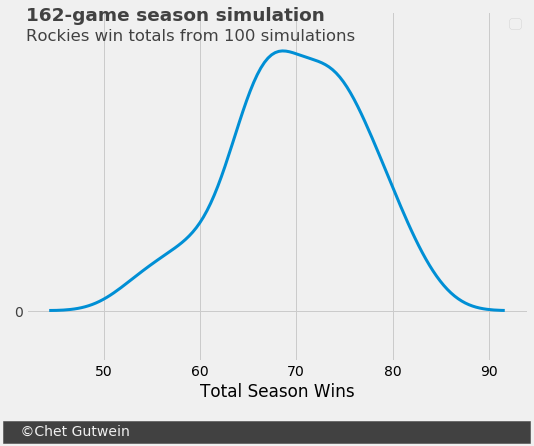

In [42]:
# Plot the results
# Setting FiveThirtyEight style
plt.style.use('fivethirtyeight')

# Setting size of our plot
fig, ax = plt.subplots(figsize=(8,6))

# Generate density plots
sns.distplot(results_3[0,:], hist = False, kde = True,
            kde_kws = {'linewidth': 3},
            label = '162-game season')

  
# Plot formatting
# Y axis past 0 & above 100 -- grid line will pass 0 & 100 marker
plt.ylim(-0.01,0.06)

# Y-labels to only these
ax.set_yticks([0])
ax.set_yticklabels(labels=['0'], fontsize=14, color='#414141')

# Title text
ax.text(x=42, y=0.058, s="162-game season simulation", fontsize=18.5, fontweight='semibold', color='#414141')

# Subtitle text
ax.text(x=42, y=0.054, s='Rockies win totals from 100 simulations', fontsize=16.5, color='#414141')

ax.set_ylabel('')    
ax.set_xlabel('Total Season Wins')

# legend
ax.legend('')

# Line at bottom for signature line
ax.text(x = 40, y = -0.025,
    s = '   ©Chet Gutwein                                                                                        ',
    fontsize = 14, color = '#f0f0f0', backgroundcolor = '#414141');

C:\Users\Gutwein\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


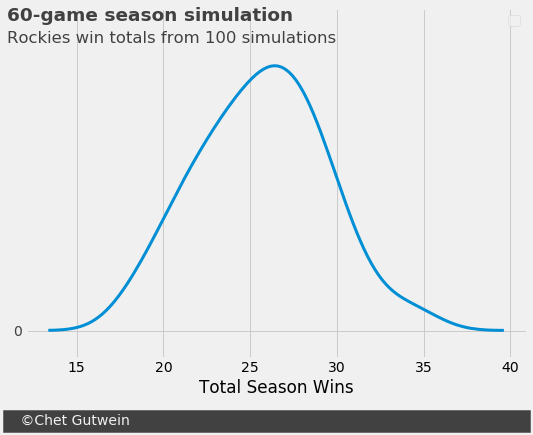

In [47]:
# Plot the results
# Setting FiveThirtyEight style
plt.style.use('fivethirtyeight')

# Setting size of our plot
fig, ax = plt.subplots(figsize=(8,6))

# Generate density plots
sns.distplot(results_4[0,:], hist = False, kde = True,
            kde_kws = {'linewidth': 3},
            label = '60-game season')

  
# Plot formatting
# Y axis past 0 & above 100 -- grid line will pass 0 & 100 marker
plt.ylim(-0.01,0.12)

# Y-labels to only these
ax.set_yticks([0])
ax.set_yticklabels(labels=['0'], fontsize=14, color='#414141')

# Title text
ax.text(x=11, y=0.115, s="60-game season simulation", fontsize=18.5, fontweight='semibold', color='#414141')

# Subtitle text
ax.text(x=11, y=0.107, s='Rockies win totals from 100 simulations', fontsize=16.5, color='#414141')

ax.set_ylabel('')    
ax.set_xlabel('Total Season Wins')

# legend
ax.legend('')

# Line at bottom for signature line
ax.text(x = 11, y = -0.035,
    s = '   ©Chet Gutwein                                                                                        ',
    fontsize = 14, color = '#f0f0f0', backgroundcolor = '#414141');

In [52]:
np.quantile(results_3, [0.999,0.99, 0.95,0.75, 0.5, 0.25, 0.05])

array([83.  , 83.  , 80.  , 75.  , 69.5 , 65.75, 57.9 ])

In [53]:
np.quantile(results_4, [0.999,0.99, 0.95,0.75, 0.5, 0.25, 0.05])

array([34.901, 34.01 , 31.05 , 28.   , 26.   , 23.   , 19.95 ])